In [5]:
import pandas as pd
df = pd.read_csv('student-performance-factors/StudentPerformanceFactors.csv') # load the dataset
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [9]:
# perform data cleaning
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
# checking if the data is cleaned or not
print("After cleaning the data: ", df.shape)

After cleaning the data:  (6378, 20)


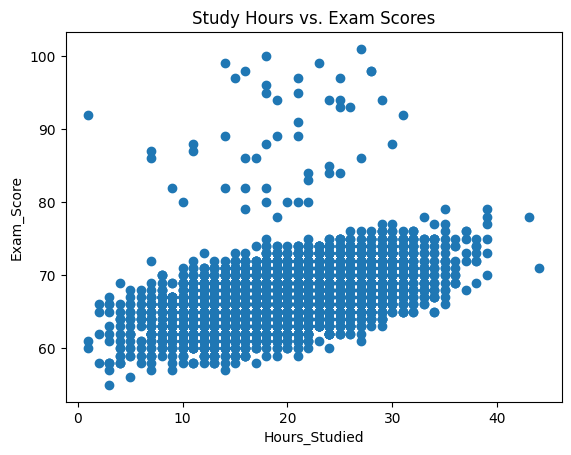

In [10]:
# basic visualization to understand the data
import matplotlib.pyplot as plt
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Study Hours vs. Exam Scores')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.show()

In [14]:
# split features & target
X = df[['Hours_Studied']]
y = df['Exam_Score']

In [15]:
# split the dateset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# now train the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# now predict the model
y_pred = model.predict(X_test)

In [18]:
# now compare the actual value with the predicted value
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual  Predicted
2814      74  70.428618
4421      66  65.238450
4282      70  69.275248
1246      72  67.256849
4699      67  66.391820
...      ...        ...
6220      69  69.275248
5485      65  68.410219
5076      63  67.256849
6503      67  64.950107
2730      74  69.275248

[1276 rows x 2 columns]


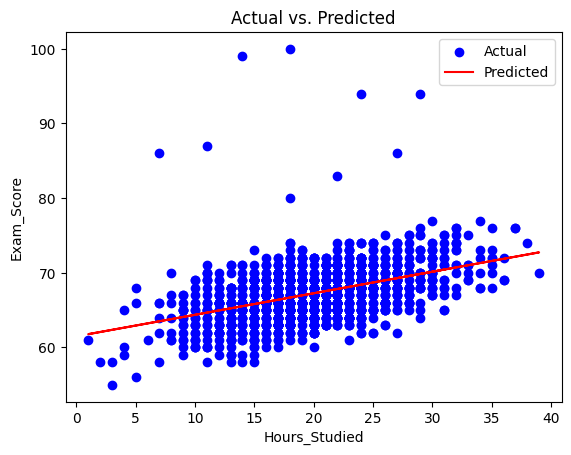

In [19]:
# visualizing this prediction
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [20]:
# now evaluate the model performance
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

Mean Absolute Error:  2.5292420695261244
R2 Score:  0.20513060832466712


In [23]:
# now let's move to the bonus part

# trying polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# fit on the training data
poly_model.fit(X_train, y_train)

# now predict
y_pred_poly = poly_model.predict(X_test)

# evaluate the model
mae_poly = mean_absolute_error(y_test,y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Mean Absolute Error: ", mae_poly)
print("R2 Score: ", r2_poly)

Mean Absolute Error:  2.5285609417656434
R2 Score:  0.2050784559067499


In [45]:
# Load dataset again (make sure nothing modified it above)
df = pd.read_csv('student-performance-factors/StudentPerformanceFactors.csv').copy()

# Use only the rows where Exam_Score is not null (just to be safe)
df = df[df['Exam_Score'].notnull()]

# trying different feature combinations

# adding more features
features = ['Hours_Studied', 'Sleep_Hours']

# cleaning the numeric conversion
for col in features + ['Exam_Score']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=features + ['Exam_Score'], inplace=True)

# redefining X and y
X_multiF = df[features]
y_multiF = df['Exam_Score']

# split the dateset into training and testing dataset
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiF, y_multiF, test_size=0.25, random_state=42)

# now again train the basic linear regression on these multi features
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# now predict
y_pred_m = multi_model.predict(X_test_m)

# now evaluate the model
mae_m = mean_absolute_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)
print("Mean Absolute Error: ", mae_m)
print("R2 Score: ", r2_m)

Mean Absolute Error:  2.437054729204729
R2 Score:  0.2304494282283207


In [47]:
print("Comparing Performance")
print("Linear Regression     → MAE:", mae, "R2:", r2)
print("Polynomial Regression → MAE:", mae_poly, "R2:", r2_poly)
print("Multi-Feature Linear  → MAE:", mae_m, "R2:", r2_m)

Comparing Performance
Linear Regression     → MAE: 2.5292420695261244 R2: 0.20513060832466712
Polynomial Regression → MAE: 2.5285609417656434 R2: 0.2050784559067499
Multi-Feature Linear  → MAE: 2.437054729204729 R2: 0.2304494282283207
